In [1]:
import numpy as np
import pandas as pd
from itertools import *
import matplotlib.pyplot as plt

In [2]:
def read_data(url, header):
    # function for reading data
    df = pd.read_csv(url, header=header, index_col=0)
    return df

In [3]:
def add_noise(df,scorer,bodypart,coord, m, noise):
    # function for adding noise to the selected coordinate (coord) of a certain body part (bodypart)
    df.loc[filenames[:m],(scorer, bodypart, coord)] = df.loc[filenames[:m],(scorer, bodypart, coord)] + np.abs(np.random.normal(0, 1, m)) * noise
    return df

In [4]:
def swap_2bodyparts(df,df_fake,scorer,bodypart1, bodypart2, n):
    # function for swapping two body parts
    df_fake.loc[filenames[:n],(scorer, bodypart1, 'x')] = df.loc[filenames[:n],(scorer, bodypart2, 'x')]
    df_fake.loc[filenames[:n],(scorer, bodypart1, 'y')] = df.loc[filenames[:n],(scorer, bodypart2, 'y')]
    
    df_fake.loc[filenames[:n],(scorer, bodypart2, 'x')] = df.loc[filenames[:n],(scorer, bodypart1, 'x')]
    df_fake.loc[filenames[:n],(scorer, bodypart2, 'y')] = df.loc[filenames[:n],(scorer, bodypart1, 'y')]
    
    return df_fake

In [5]:
def comp_dist(features,df, scorer, bodypart1, bodypart2):
    # function for computing the distance between two body parts: bodypart1 and bodypart2
    
    name = bodypart1 + '_' + bodypart2
    features[name] = np.sqrt(np.square(df[scorer,bodypart1, 'x'] - df[scorer,bodypart2, 'x'])+np.square(df[scorer,bodypart1, 'y'] - df[scorer, bodypart2, 'y']))
    
    return features

In [6]:
def plot_ind(x_data,y_data,labels,cluster_n):
    # function for plotting indices
    pic_num = np.array(np.where(labels==cluster_n))
    for i in pic_num[0,:]:
        plt.text(x_data[i]+0.1,y_data[i],i)
    return 

In [7]:
def find_y_size(df, num, scorer, bodyparts):
    # function for finding the height of the horse in the selected image
    
    y_min = min(df.loc[filenames[num], (scorer,bodyparts,'y' )])
    y_max = max(df.loc[filenames[num], (scorer,bodyparts,'y' )])
    
    return (y_max - y_min)

In [8]:
def resizing_images(samp_size, df_features, filenames, distances, df, scorer,bodyparts):
    # resizing the images that all horses are about the same size

    y_size = [] # height of the horse in the image
    coef = [] # coefficient: height of the horse in the image divided by height of the horse in selected image
    for i in range(df_features.shape[0]):
        y_size.append(find_y_size(df, i, scorer, bodyparts))
        coef.append(y_size[i]/samp_size)
    df_norm = df_features.copy()
    for i in range(df_features.shape[1]):
        df_norm.loc[filenames,distances[i]] = [a/b for a,b in zip(df_features.loc[filenames,distances[i]], coef)]
    
    return df_norm

In [9]:
def train_test_split(data):
    x_train = data.copy()
    x_test = data.copy()

    r1 = range(300,500)
    r2 = range(300)

    x_train = x_train.drop(r1) # - 200
    x_test = x_test.drop(r2) # - 300

    x_train = x_train.drop(range(2000,3069)) # - 1069
    x_test = x_test.drop(range(500,2000)) # - 1500
    return x_train, x_test

In [10]:
# reading data
filename = 'yourpath/Unsupervised_detection_methods/horse_dataset/CollectedData_Byron.csv' # need to change path to the horse-10 data set
header = [0, 1, 2] ### if multi-animal project, header = [0, 1, 2, 3]

df = read_data(filename, header) # reading data
df.head()

scorer                      Byron                              \
bodyparts                    Nose        Eye     Nearknee       
coords                          x      y   x   y        x   y   
BrownHorseinShadow/0050.png  17.0  302.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0051.png  21.0  304.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0052.png  24.0  301.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0053.png  30.0  302.0 NaN NaN      NaN NaN   
BrownHorseinShadow/0054.png  32.0  299.0 NaN NaN      NaN NaN   

scorer                                                              ...  \
bodyparts                   Nearfrontfetlock     Nearfrontfoot      ...   
coords                                     x   y             x   y  ...   
BrownHorseinShadow/0050.png              NaN NaN           NaN NaN  ...   
BrownHorseinShadow/0051.png              NaN NaN           NaN NaN  ...   
BrownHorseinShadow/0052.png              NaN NaN           NaN NaN  ...   
BrownHorseinShadow/0053.png              NaN NaN           NaN NaN  ...   
BrownHorseinShadow/0054.png              NaN NaN           NaN NaN  ...   

scorer                                                                     \
bodyparts                   Stifle     Offhindhock     Offhindfetlock       
coords                           x   y           x   y              x   y   
BrownHorseinShadow/0050.png    NaN NaN         NaN NaN            NaN NaN   
BrownHorseinShadow/0051.png    NaN NaN         NaN NaN            NaN NaN   
BrownHorseinShadow/0052.png    NaN NaN         NaN NaN            NaN NaN   
BrownHorseinShadow/0053.png    NaN NaN         NaN NaN            NaN NaN   
BrownHorseinShadow/0054.png    NaN NaN         NaN NaN            NaN NaN   

scorer                                                   
bodyparts                   Offhindfoot     Ischium      
coords                                x   y       x   y  
BrownHorseinShadow/0050.png         NaN NaN     NaN NaN  
BrownHorseinShadow/0051.png         NaN NaN     NaN NaN  
BrownHorseinShadow/0052.png         NaN NaN     NaN NaN  
BrownHorseinShadow/0053.png         NaN NaN     NaN NaN  
BrownHorseinShadow/0054.png         NaN NaN     NaN NaN  

[5 rows x 44 columns]

In [11]:
# remove missing values
df = df.dropna()
df.head()

scorer                       Byron                                       \
bodyparts                     Nose           Eye        Nearknee          
coords                           x      y      x      y        x      y   
BrownHorseinShadow/0131.png  304.0  287.0  270.0  216.0    220.0  337.0   
BrownHorseinShadow/0132.png  309.0  288.0  279.0  222.0    222.0  338.0   
BrownHorseinShadow/0133.png  313.0  293.0  282.0  223.0    223.0  338.0   
BrownHorseinShadow/0134.png  319.0  293.0  286.0  226.0    225.0  338.0   
BrownHorseinShadow/0135.png  322.0  297.0  292.0  229.0    228.0  337.0   

scorer                                                                    ...  \
bodyparts                   Nearfrontfetlock        Nearfrontfoot         ...   
coords                                     x      y             x      y  ...   
BrownHorseinShadow/0131.png            222.0  384.0         240.0  403.0  ...   
BrownHorseinShadow/0132.png            222.0  384.0         240.0  403.0  ...   
BrownHorseinShadow/0133.png            222.0  383.0         240.0  403.0  ...   
BrownHorseinShadow/0134.png            224.0  379.0         240.0  403.0  ...   
BrownHorseinShadow/0135.png            226.0  380.0         240.0  403.0  ...   

scorer                                                                       \
bodyparts                   Stifle        Offhindhock        Offhindfetlock   
coords                           x      y           x      y              x   
BrownHorseinShadow/0131.png   73.0  272.0        69.0  323.0          100.0   
BrownHorseinShadow/0132.png   76.0  272.0        79.0  323.0          108.0   
BrownHorseinShadow/0133.png   76.0  271.0        84.0  326.0          117.0   
BrownHorseinShadow/0134.png   84.0  269.0        87.0  326.0          122.0   
BrownHorseinShadow/0135.png   84.0  269.0        97.0  329.0          127.0   

scorer                                                                
bodyparts                          Offhindfoot        Ischium         
coords                           y           x      y       x      y  
BrownHorseinShadow/0131.png  380.0       115.0  402.0    22.0  219.0  
BrownHorseinShadow/0132.png  383.0       124.0  404.0    24.0  216.0  
BrownHorseinShadow/0133.png  384.0       132.0  404.0    28.0  215.0  
BrownHorseinShadow/0134.png  385.0       138.0  404.0    29.0  216.0  
BrownHorseinShadow/0135.png  384.0       144.0  404.0    35.0  218.0  

[5 rows x 44 columns]

In [12]:
filenames = df.index # names of images
scorer = 'Byron'

In [33]:
a = df.columns
bodyparts = np.zeros(len(df.columns)).astype(str)
coord = np.zeros(len(df.columns)).astype(str)

for i in range(len(df.columns)):
    bodyparts[i] = a[i][1]
    coord[i] = a[i][2]
    
bodyparts = np.unique(bodyparts) # 22 unique labels
print("Unique body parts:",bodyparts)

Unique body parts: ['Elbow' 'Eye' 'Girth' 'Hip' 'Ischium' 'Midshoulder' 'Nearfrontfetlock'
 'Nearfrontfoot' 'Nearhindfetlock' 'Nearhindfoot' 'Nearhindhock'
 'Nearknee' 'Nose' 'Offfrontfetlock' 'Offfrontfoot' 'Offhindfetlock'
 'Offhindfoot' 'Offhindhock' 'Offknee' 'Shoulder' 'Stifle' 'Wither']


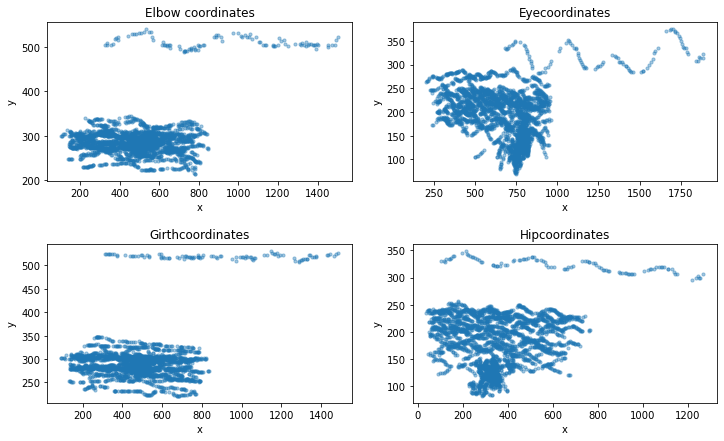

In [34]:
# data visualization
# here you can see x and y coordinates of the body parts where each point corresponds to one image

fig, axs = plt.subplots(2, 2, figsize=(12, 7))
axs[0, 0].scatter(df.loc[filenames[:],(scorer, bodyparts[0], 'x')], df.loc[filenames[:],(scorer, bodyparts[0], 'y')], s = 10, alpha=0.4)
axs[0, 0].set_title (bodyparts[0] +" coordinates")

axs[0, 1].scatter(df.loc[filenames[:],(scorer, bodyparts[1], 'x')], df.loc[filenames[:],(scorer, bodyparts[1], 'y')], s = 10, alpha=0.4)
axs[0, 1].set_title (bodyparts[1] +"coordinates")

axs[1, 0].scatter(df.loc[filenames[:],(scorer, bodyparts[2], 'x')], df.loc[filenames[:],(scorer, bodyparts[2], 'y')], s = 10, alpha=0.4)
axs[1, 0].set_title (bodyparts[2] +"coordinates")

axs[1, 1].scatter(df.loc[filenames[:],(scorer, bodyparts[3], 'x')], df.loc[filenames[:],(scorer, bodyparts[3], 'y')], s = 10, alpha=0.4)
axs[1, 1].set_title (bodyparts[3] +"coordinates")

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')
    
plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [57]:
# computing distances between all body parts to use these values as features in the future

features = pd.DataFrame()

for bodypart_list in combinations(bodyparts, 2):
    features = comp_dist(features,df, scorer,bodypart_list[0], bodypart_list[1])
    
features.head()

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,132.003788,8.062258,132.548104,144.996552,73.498299,125.095963,150.903943,148.922799,150.711645,106.230881,...,106.480045,139.588681,51.156622,180.800996,95.126232,126.035709,172.072659,119.941652,80.411442,140.185591
BrownHorseinShadow/0132.png,134.617978,9.219544,136.883162,148.932871,75.802375,121.264174,146.996599,150.711645,151.743204,108.268186,...,116.709040,131.726990,51.088159,175.573346,91.000000,139.517024,170.660482,117.957620,80.411442,138.708327
BrownHorseinShadow/0133.png,135.959553,10.000000,137.440896,150.296374,79.881162,115.433964,142.003521,150.602125,150.748134,109.416635,...,118.532696,135.484316,55.578773,178.339564,89.005618,145.261833,169.070991,124.903963,81.024688,141.675686
BrownHorseinShadow/0134.png,133.270402,10.630146,140.356688,154.738489,81.987804,109.077954,137.905765,154.841855,154.155765,113.885908,...,121.926207,137.200583,57.078893,179.446371,85.052925,143.387587,165.339046,121.696343,81.024688,138.105032
BrownHorseinShadow/0135.png,130.613935,12.727922,141.354165,154.304893,77.820306,108.300508,135.203550,161.152102,159.831161,118.680243,...,121.696343,138.437712,61.392182,176.646540,87.091905,152.594233,167.886867,130.751673,82.540899,138.105032


In [58]:
print("Shape of the data set with features:",features.shape)

Shape of the data set with features: (3069, 231)


In [59]:
distances = features.columns
print("Number of features:",len(distances))

Number of features: 231


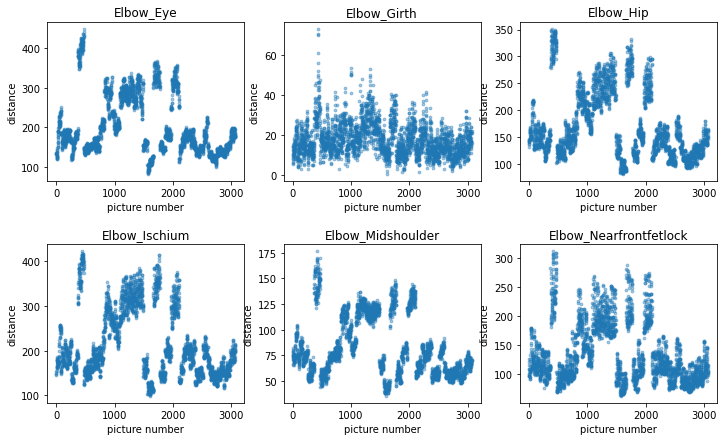

In [60]:
# visualization of distances in the original dataset

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, features[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, features[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, features[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, features[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, features[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, features[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')

plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [61]:
# choose image "Sample20/0020.png" as a sample

inx = np.where(filenames == 'Sample20/0020.png')
sample =df.loc['Sample20/0020.png', (scorer, bodyparts, 'y')]
samp_size = max(sample) - min(sample)
print("Height of the horse in the selected image:",samp_size)

Height of the horse in the selected image: 404.0


In [62]:
resized_features = resizing_images(samp_size, features, filenames, distances, df, scorer,bodyparts)
resized_features.head() # resized features of every image

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,237.020135,14.476232,237.997485,260.349364,131.970280,224.616752,270.956413,267.399159,270.611132,190.743448,...,191.190836,250.639233,91.854557,324.638232,170.804434,226.304118,308.966019,215.361900,144.383211,251.711017
BrownHorseinShadow/0132.png,240.644527,16.480956,244.693794,266.233981,135.505130,216.773126,262.772681,269.413737,271.257763,193.541358,...,208.630319,235.476567,91.325736,313.856779,162.672566,249.402114,305.074489,210.862293,143.744348,247.956478
BrownHorseinShadow/0133.png,241.972068,17.797357,244.608468,267.487820,142.167354,205.441944,252.728734,268.031975,268.291834,194.732689,...,210.956868,241.126272,98.915525,317.397285,158.406474,258.527667,300.901676,222.296040,144.202528,252.145274
BrownHorseinShadow/0134.png,237.186090,18.918850,249.797807,275.393611,145.916620,194.129927,245.435811,275.577574,274.356516,202.686814,...,216.996422,244.180773,101.585342,319.367109,151.371725,255.192004,294.259799,216.587325,144.202528,245.790454
BrownHorseinShadow/0135.png,232.458281,22.652337,251.573052,274.621924,138.499575,192.746278,240.626583,286.808146,284.457220,211.219463,...,216.587325,246.382535,109.261857,314.384150,155.000572,271.577402,298.794247,232.703418,146.900983,245.790454


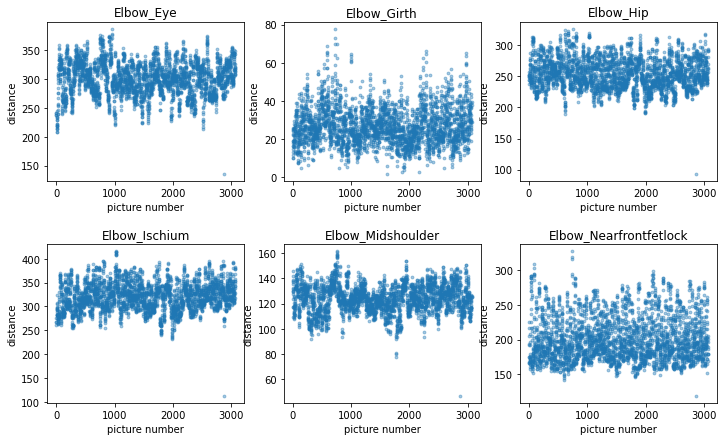

In [63]:
# visualization of distances after resizing original dataset

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, resized_features[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, resized_features[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, resized_features[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, resized_features[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, resized_features[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, resized_features[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')
    
plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [139]:
# adding corrupted data in the original dataset

bodypart = 'Nose' # choose body part
number_of_corrupted_images = 500 # first 500 images with fake noise
print("images with fake noise", number_of_corrupted_images)

images with fake noise 500


In [140]:
# adding random noise to the original data set
df_with_corrupted_data = df.copy(deep=True)

df_with_corrupted_data = add_noise(df_with_corrupted_data, scorer, bodypart, 'x', number_of_corrupted_images, 10)
df_with_corrupted_data = add_noise(df_with_corrupted_data, scorer, bodypart,'y', number_of_corrupted_images, 10)
df_with_corrupted_data.head(25)

scorer                            Byron                                     \
bodyparts                          Nose                Eye        Nearknee   
coords                                x           y      x      y        x   
BrownHorseinShadow/0131.png  312.257846  287.430972  270.0  216.0    220.0   
BrownHorseinShadow/0132.png  317.187362  290.061836  279.0  222.0    222.0   
BrownHorseinShadow/0133.png  319.603482  295.788749  282.0  223.0    223.0   
BrownHorseinShadow/0134.png  323.735942  300.401203  286.0  226.0    225.0   
BrownHorseinShadow/0135.png  343.608230  303.470207  292.0  229.0    228.0   
BrownHorseinShadow/0139.png  343.942724  306.518705  315.0  239.0    229.0   
BrownHorseinShadow/0140.png  351.946341  307.395296  319.0  242.0    232.0   
BrownHorseinShadow/0141.png  350.028011  326.653605  322.0  241.0    232.0   
BrownHorseinShadow/0142.png  351.006536  310.375324  320.0  241.0    232.0   
BrownHorseinShadow/0143.png  357.139471  318.041256  324.0  240.0    234.0   
BrownHorseinShadow/0144.png  371.337620  311.705969  329.0  238.0    237.0   
BrownHorseinShadow/0145.png  367.441882  306.349537  335.0  238.0    238.0   
BrownHorseinShadow/0146.png  370.708306  306.731132  341.0  235.0    240.0   
BrownHorseinShadow/0147.png  382.887761  309.241332  346.0  232.0    240.0   
BrownHorseinShadow/0158.png  427.017205  303.895253  398.0  227.0    261.0   
BrownHorseinShadow/0159.png  437.804310  299.968736  404.0  226.0    263.0   
BrownHorseinShadow/0160.png  449.757842  301.518140  405.0  222.0    270.0   
BrownHorseinShadow/0161.png  446.328315  307.057436  411.0  224.0    275.0   
BrownHorseinShadow/0162.png  461.249768  308.250845  417.0  223.0    285.0   
BrownHorseinShadow/0163.png  453.442420  303.529817  421.0  221.0    294.0   
BrownHorseinShadow/0164.png  469.014540  298.833806  426.0  222.0    303.0   
BrownHorseinShadow/0168.png  477.480671  305.912267  454.0  238.0    348.0   
BrownHorseinShadow/0169.png  495.516720  309.724609  460.0  237.0    354.0   
BrownHorseinShadow/0171.png  500.998465  311.135352  471.0  240.0    374.0   
BrownHorseinShadow/0173.png  504.299771  315.959980  482.0  243.0    390.0   

scorer                                                                    \
bodyparts                          Nearfrontfetlock        Nearfrontfoot   
coords                           y                x      y             x   
BrownHorseinShadow/0131.png  337.0            222.0  384.0         240.0   
BrownHorseinShadow/0132.png  338.0            222.0  384.0         240.0   
BrownHorseinShadow/0133.png  338.0            222.0  383.0         240.0   
BrownHorseinShadow/0134.png  338.0            224.0  379.0         240.0   
BrownHorseinShadow/0135.png  337.0            226.0  380.0         240.0   
BrownHorseinShadow/0139.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0140.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0141.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0142.png  333.0            223.0  379.0         236.0   
BrownHorseinShadow/0143.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0144.png  334.0            223.0  379.0         236.0   
BrownHorseinShadow/0145.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0146.png  335.0            223.0  379.0         236.0   
BrownHorseinShadow/0147.png  334.0            223.0  379.0         236.0   
BrownHorseinShadow/0158.png  336.0            238.0  374.0         238.0   
BrownHorseinShadow/0159.png  336.0            240.0  374.0         241.0   
BrownHorseinShadow/0160.png  334.0            243.0  373.0         242.0   
BrownHorseinShadow/0161.png  332.0            248.0  373.0         242.0   
BrownHorseinShadow/0162.png  336.0            255.0  374.0         245.0   
BrownHorseinShadow/0163.png  338.0            265.0  376.0         249.0   
BrownHorseinShadow/0164.png  339.0            277.0  378.0         

In [141]:
# calculating of distances in the dataset with corrupted data

features_with_noise = pd.DataFrame()

for bodypart_list in combinations(bodyparts, 2):
    features_with_noise = comp_dist(features_with_noise,df_with_corrupted_data, scorer,bodypart_list[0], bodypart_list[1])

features_with_noise.head(10)

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,132.003788,8.062258,132.548104,144.996552,73.498299,125.095963,150.903943,148.922799,150.711645,106.230881,...,106.480045,139.588681,51.156622,180.800996,95.126232,126.035709,172.072659,119.941652,80.411442,140.185591
BrownHorseinShadow/0132.png,134.617978,9.219544,136.883162,148.932871,75.802375,121.264174,146.996599,150.711645,151.743204,108.268186,...,116.709040,131.726990,51.088159,175.573346,91.000000,139.517024,170.660482,117.957620,80.411442,138.708327
BrownHorseinShadow/0133.png,135.959553,10.000000,137.440896,150.296374,79.881162,115.433964,142.003521,150.602125,150.748134,109.416635,...,118.532696,135.484316,55.578773,178.339564,89.005618,145.261833,169.070991,124.903963,81.024688,141.675686
BrownHorseinShadow/0134.png,133.270402,10.630146,140.356688,154.738489,81.987804,109.077954,137.905765,154.841855,154.155765,113.885908,...,121.926207,137.200583,57.078893,179.446371,85.052925,143.387587,165.339046,121.696343,81.024688,138.105032
BrownHorseinShadow/0135.png,130.613935,12.727922,141.354165,154.304893,77.820306,108.300508,135.203550,161.152102,159.831161,118.680243,...,121.696343,138.437712,61.392182,176.646540,87.091905,152.594233,167.886867,130.751673,82.540899,138.105032
BrownHorseinShadow/0139.png,126.873953,10.770330,147.200543,161.136588,78.549348,99.724621,125.542821,176.300879,177.589414,135.440024,...,144.055545,150.632002,62.169124,181.969778,86.683332,169.000000,169.189243,140.431478,83.671979,141.534448
BrownHorseinShadow/0140.png,125.542821,5.830952,142.200563,164.395864,78.790862,99.689518,125.283678,177.507746,181.320159,137.640837,...,149.000000,155.618122,65.924199,185.569394,85.906926,172.699160,169.189243,143.265488,84.528102,141.598023
BrownHorseinShadow/0141.png,126.530629,9.433981,145.801235,162.163498,76.059187,97.082439,122.527548,177.002825,182.428068,137.087563,...,157.012738,158.808060,65.620119,186.590461,82.710338,177.552809,169.366467,145.993151,87.658428,141.598023
BrownHorseinShadow/0142.png,119.970830,13.928388,145.602198,163.082801,75.133215,96.176920,121.276543,181.342218,186.400107,138.495487,...,162.049375,163.975608,64.381674,190.286626,80.523289,179.334882,166.784292,150.083310,87.206651,146.000000
BrownHorseinShadow/0143.png,123.130013,12.649111,143.840189,162.963186,74.686009,96.026038,121.049577,180.471604,187.200427,140.246212,...,170.002941,166.481230,64.031242,192.481168,82.565126,183.174780,171.026314,148.862353,89.000000,145.248064


In [73]:
# resizing the images that all horses are about the same size
resized_data = resizing_images(samp_size, features_with_noise, filenames, distances, df_with_corrupted_data, scorer,bodyparts)
resized_data.head() # resized features of every image in data set with corrupted data

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
BrownHorseinShadow/0131.png,237.020135,14.476232,237.997485,260.349364,131.970280,224.616752,270.956413,267.399159,270.611132,190.743448,...,191.190836,250.639233,91.854557,324.638232,170.804434,226.304118,308.966019,215.361900,144.383211,251.711017
BrownHorseinShadow/0132.png,240.644527,16.480956,244.693794,266.233981,135.505130,216.773126,262.772681,269.413737,271.257763,193.541358,...,208.630319,235.476567,91.325736,313.856779,162.672566,249.402114,305.074489,210.862293,143.744348,247.956478
BrownHorseinShadow/0133.png,241.972068,17.797357,244.608468,267.487820,142.167354,205.441944,252.728734,268.031975,268.291834,194.732689,...,210.956868,241.126272,98.915525,317.397285,158.406474,258.527667,300.901676,222.296040,144.202528,252.145274
BrownHorseinShadow/0134.png,237.186090,18.918850,249.797807,275.393611,145.916620,194.129927,245.435811,275.577574,274.356516,202.686814,...,216.996422,244.180773,101.585342,319.367109,151.371725,255.192004,294.259799,216.587325,144.202528,245.790454
BrownHorseinShadow/0135.png,232.458281,22.652337,251.573052,274.621924,138.499575,192.746278,240.626583,286.808146,284.457220,211.219463,...,216.587325,246.382535,109.261857,314.384150,155.000572,271.577402,298.794247,232.703418,146.900983,245.790454


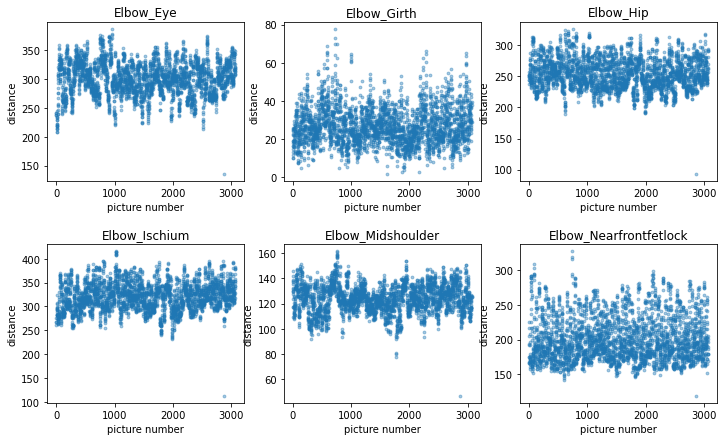

In [74]:
# visualization of distances between two different key points for each image

fig, axs = plt.subplots(2, 3, figsize=(12, 7))
ind = range(df.shape[0])
axs[0, 0].scatter(ind, resized_data[distances[0]], s = 8, alpha=0.4)
axs[0, 0].set_title (distances[0])

axs[0, 1].scatter(ind, resized_data[distances[1]], s = 8, alpha=0.4)
axs[0, 1].set_title (distances[1])

axs[0, 2].scatter(ind, resized_data[distances[2]], s = 8, alpha=0.4)
axs[0, 2].set_title (distances[2])

axs[1, 0].scatter(ind, resized_data[distances[3]], s = 8, alpha=0.4)
axs[1, 0].set_title (distances[3])

axs[1, 1].scatter(ind, resized_data[distances[4]], s = 8, alpha=0.4)
axs[1, 1].set_title (distances[4])

axs[1, 2].scatter(ind, resized_data[distances[5]], s = 8, alpha=0.4)
axs[1, 2].set_title (distances[5])

for ax in axs.flat:
    ax.set(xlabel='picture number', ylabel='distance')
    
plt.subplots_adjust(wspace=0.2, hspace=0.4)

In [75]:
from sklearn.preprocessing import StandardScaler

resized_scaled_data = StandardScaler().fit_transform(resized_data) # standardization of the data 
resized_scaled_data = pd.DataFrame(resized_scaled_data)
resized_scaled_data.columns = features_with_noise.columns

In [76]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2)
model.fit_predict(resized_scaled_data)
labels = model.labels_

# PCA projection to 2D
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(resized_scaled_data)

# putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

x_data = resized_data['Eye_Nose']
y_data = resized_data['Elbow_Nose']

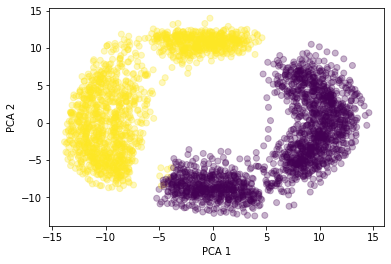

In [77]:
# visualization of clustered data projected onto the first two PCA components

plt.scatter(PCA_components[0], PCA_components[1], alpha=.3, c=labels)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

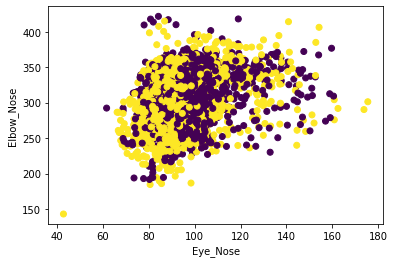

In [78]:
# visualization of the k-means clustering in the Eye_Nose and Elbow_Nose space

plt.scatter(x_data, y_data, c=labels)
plt.xlabel('Eye_Nose')
plt.ylabel('Elbow_Nose')
plt.show()

In [79]:
print("Images in the zero cluster: ", len(df.index[np.where(labels == 0)]))

Images in the zero cluster:  1619


In [80]:
print("Images in the first cluster: ", len(df.index[np.where(labels == 1)]))

Images in the first cluster:  1450


In [81]:
def show_clusters(X, cluster):
    # function for visualization of clusters after applying DBSCAN clustering
    df = X
    df.loc[:,'label'] = cluster
    colors = {-1: 'red', 0: 'blue', 1:'orange', 2:'green', 3:'yellow', 4:'black', 5:'gold', 6:'lightblue', 7:'darkgreen'}
    fig, ax = plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x=0, y=1, label=key, color=colors[key])
    plt.xlabel('pca 1')
    plt.ylabel('pca 2')
    plt.show()

In [122]:
# DBSCAN clustering applied to the data set with 16% of corrupted images

from sklearn.cluster import DBSCAN

# min_samples = the minimum number of core points needed in order to form a cluster
# eps = the maximum distance between two samples for them to be considered as in the same cluster

dbscan=DBSCAN(eps = 1.4, min_samples = 20)

# fit - perform DBSCAN clustering from features, or distance matrix.
dbscan = dbscan.fit(PCA_components)

In [123]:
cluster = dbscan.labels_
print("Number of clusters: ",len(set(cluster)))

Number of clusters:  4


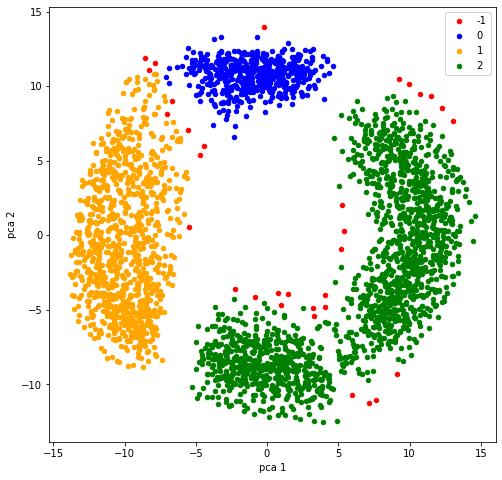

In [124]:
# visualization of clusters after applying DBSCAN clustering
# red points correspond to outliers
show_clusters(PCA_components, cluster)

In [125]:
print("Number of found outliers:",(resized_scaled_data['label'] == -1).sum())

Number of found outliers: 32


In [126]:
print('cluster with outliers (jitter):', np.where(resized_scaled_data['label'] == -1))

cluster with outliers (jitter): (array([  21,   22,  259,  378,  634,  635,  636,  742,  743,  744,  745,
        746,  747, 1039, 1324, 1372, 1548, 1549, 1550, 1774, 1775, 1776,
       1971, 1972, 1974, 2067, 2490, 2590, 2808, 2868, 2877, 2918],
      dtype=int64),)


In [121]:
### Challenge of horse data
# - more body parts 
# - different quality of images
# - sometimes only part of the horse is visible

In [143]:
#################

# LR test before resizing

# so far we have worked on feature engineering and clustering. Here we wanted to see 
# if a simple supervised classifier can predict the labels (corrupted or not) from the features

# we generated corrupted data and separated the data set into train and test sets
# we are solving binary classification problem – does the image have corrupted label or no

scaled_data = StandardScaler().fit_transform(features_with_noise) # standardization of the data with noise 
scaled_data = pd.DataFrame(scaled_data)
scaled_data.columns = features_with_noise.columns
scaled_data.head()

,Elbow_Eye,Elbow_Girth,Elbow_Hip,Elbow_Ischium,Elbow_Midshoulder,Elbow_Nearfrontfetlock,Elbow_Nearfrontfoot,Elbow_Nearhindfetlock,Elbow_Nearhindfoot,Elbow_Nearhindhock,...,Offhindhock_Offknee,Offhindhock_Shoulder,Offhindhock_Stifle,Offhindhock_Wither,Offknee_Shoulder,Offknee_Stifle,Offknee_Wither,Shoulder_Stifle,Shoulder_Wither,Stifle_Wither
0,-0.964549,-1.179706,-0.641508,-0.943882,-0.355221,-0.214505,-0.189860,-0.748221,-0.785383,-1.074644,...,-1.335493,-1.270595,-1.119391,-0.852259,-0.434194,-0.943204,-0.330792,-1.160458,-0.544571,-0.620576
1,-0.929329,-1.041106,-0.570921,-0.891943,-0.274611,-0.289078,-0.253289,-0.728642,-0.774728,-1.048705,...,-1.212863,-1.354120,-1.121576,-0.910707,-0.538785,-0.762511,-0.351749,-1.188580,-0.544571,-0.644693
2,-0.911255,-0.947636,-0.561840,-0.873951,-0.131910,-0.402545,-0.334342,-0.729841,-0.785007,-1.034083,...,-1.191000,-1.314201,-0.978260,-0.879779,-0.589338,-0.685513,-0.375338,-1.090119,-0.528297,-0.596250
3,-0.947485,-0.872167,-0.514363,-0.815338,-0.058206,-0.526244,-0.400862,-0.683435,-0.749806,-0.977181,...,-1.150318,-1.295967,-0.930384,-0.867404,-0.689529,-0.710634,-0.430723,-1.135586,-0.528297,-0.654542
4,-0.983274,-0.620931,-0.498121,-0.821059,-0.204011,-0.541375,-0.444728,-0.614367,-0.691180,-0.916140,...,-1.153073,-1.282823,-0.792727,-0.898708,-0.637846,-0.587235,-0.392911,-1.007231,-0.488063,-0.654542


In [144]:
X_train, X_test = train_test_split(scaled_data)

Y_train = np.zeros(X_train.shape[0])
Y_train[0:300] = 1

Y_test = np.zeros(X_test.shape[0])
Y_test[0:200] = 1

In [145]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0, max_iter = 200)
classifier.fit(X_train, Y_train)

predicted_y = classifier.predict(X_test)

print('LR Accuracy (StandardScaler)')
print('test: {:.4f}'.format(roc_auc_score(Y_test,predicted_y)))

LR Accuracy (StandardScaler)
test: 0.6984


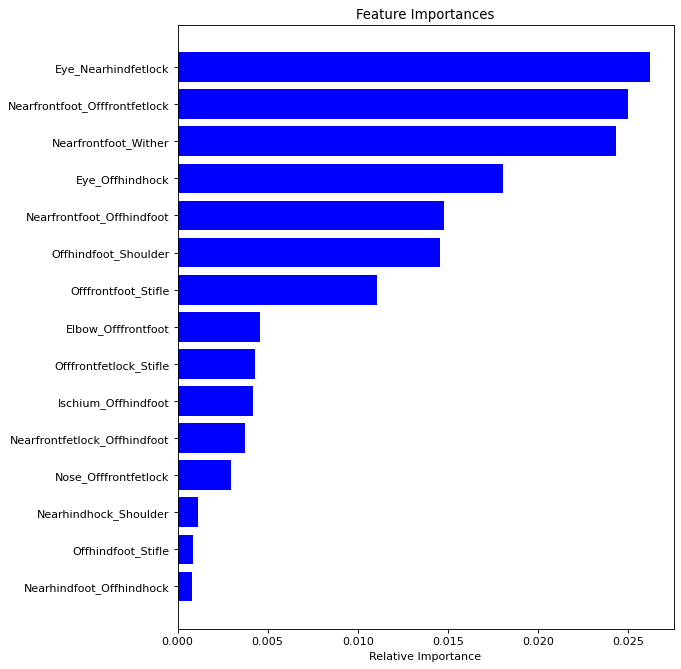

In [146]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = abs(np.std(X_train.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)
ind = indices[0:15]

plt.title('Feature Importances')
plt.barh(range(len(ind)), importances[ind], color='b', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()

In [147]:
#################

# LR test after resizing

X_train, X_test = train_test_split(resized_scaled_data)

In [148]:
print("Shape of test set: ", X_test.shape)
print("Shape of train set: ", X_train.shape)

Shape of test set:  (1269, 232)
Shape of train set:  (1800, 232)


In [149]:
classifier = LogisticRegression(random_state = 0, max_iter = 200)
classifier.fit(X_train, Y_train)

predicted_y1 = classifier.predict(X_train)
predicted_y2 = classifier.predict(X_test)

print('LR Accuracy (StandardScaler)')
print('test: {:.4f}'.format(roc_auc_score(Y_test,predicted_y2)))

LR Accuracy (StandardScaler)
test: 0.6836


In [150]:
for name, importance in zip(list(X_train), np.std(X_train.to_numpy(), 0)*classifier.coef_[0]):
    print(name, "=", importance)

Elbow_Eye = -0.5903796258015418
Elbow_Girth = 0.5920319224561362
Elbow_Hip = -0.6302192327529773
Elbow_Ischium = -0.3145997437931108
Elbow_Midshoulder = -0.153421998130136
Elbow_Nearfrontfetlock = 0.21511703143822322
Elbow_Nearfrontfoot = 0.3393840970464643
Elbow_Nearhindfetlock = 0.1803467479547435
Elbow_Nearhindfoot = 0.09674274679540813
Elbow_Nearhindhock = 0.028379694629941294
Elbow_Nearknee = 0.25172882804117486
Elbow_Nose = -0.20636919593086817
Elbow_Offfrontfetlock = 0.07260875427827841
Elbow_Offfrontfoot = -0.5230523776792534
Elbow_Offhindfetlock = -0.07883728891116261
Elbow_Offhindfoot = -0.23840166064424329
Elbow_Offhindhock = 0.1911111043509912
Elbow_Offknee = 0.33022285497018183
Elbow_Shoulder = -0.21055344416465518
Elbow_Stifle = 0.5068457621247401
Elbow_Wither = 0.32914322172161287
Eye_Girth = -0.3307122242053293
Eye_Hip = 0.03735186897021002
Eye_Ischium = -0.06507033683897251
Eye_Midshoulder = -0.8220052008997337
Eye_Nearfrontfetlock = -0.17127814551592307
Eye_Nearfrontf

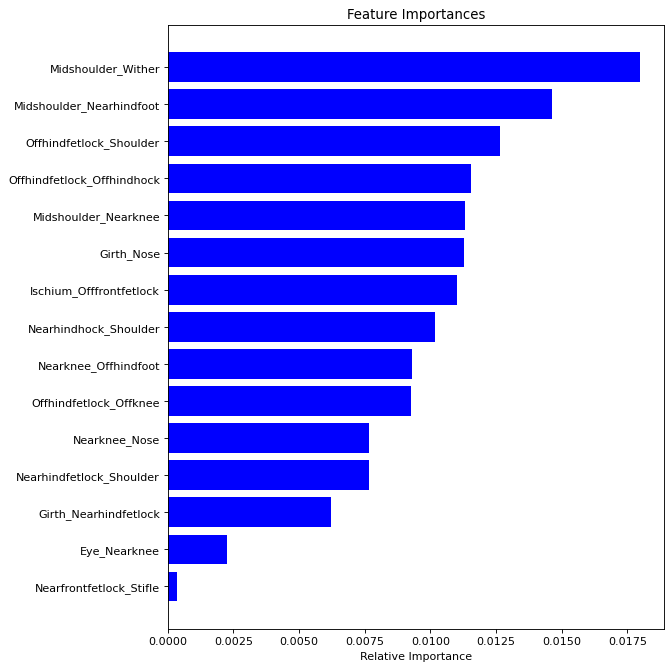

In [151]:
figure(num=None, figsize=(8, 10), dpi=80, facecolor='w', edgecolor='k')

features = list(X_train)
importances = abs(np.std(X_train.to_numpy(), 0)*classifier.coef_[0])
indices = np.argsort(importances)
ind = indices[0:15]

plt.title('Feature Importances')
plt.barh(range(len(ind)), importances[ind], color='b', align='center')
plt.yticks(range(len(ind)), [features[i] for i in ind])
plt.xlabel('Relative Importance')
plt.show()